# Импортируем необходимые библиотеки и считываем данные

In [1]:
import warnings
from IPython.display import display

from scipy import stats
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns


warnings.filterwarnings("ignore")
sns.set_palette(sns.color_palette("turbo"))
pd.set_option("display.max_columns", 100)
pd.set_option("display.precision", 2)

DATA_PATH = "./data/"
COLS_FOR_ANALYSIS_t1 = ["inc_4", "cashinc", "inkind", "privlg", "totalinc", "exp_4"]
COLS_FOR_ANALYSIS_t2 = ["salary_categorical", "sex", "sport", "educat", "healthev", "smoker"]


df = pd.read_csv(DATA_PATH + "df.csv", index_col="Unnamed: 0")

print("df shape:", df.shape)

df

df shape: (2000, 76)


,n_uhc,n_upc,year,yweight,resid,region,age,sex,ppinc_1,nummonth,educat,healthev,weight,height,sport,smoker,htype,hsize,ch0_5,ch6_12,ch13_17,elder,inc_1,inc_2,inc_3,inc_4,inc_5,inc_6,inc_7,inc_8,inc_9,inc_10,inc_11,cashinc,inkind,privlg,totalinc,exp_1,exp_2,exp_3,exp_4,exp_5,exp_6,exp_6_1,exp_6_2,exp_7,exp_8,exp_9,exp_10,exp_11,exp_12,exp_13,exp_14,exp_15,exp_16,exp_17,exp_17_1,exp_18,exp_19,exp_20,exp_21,exp_22,exp_23,exp_24,exp_25,exp_26,totalexp,hh_blint,hh_int1,hh_int2,hh_int3,hh_int4,bmi,savings,age_categorical,salary_categorical
9460,5251.0,1.0,2017.0,535,Rural,Minsk oblast,42.0,Male,759.47,12.0,Secondary education,Good,83.0,178.0,No,Yes,2 and more adults with children,3.0,1.0,0.0,0.0,0.0,791.13,3.25,0.00,0.00,268.58,0.00,0.0,18.62,6.92,0.0,0.00,1088.50,57.52,0.00,1146.02,374.13,41.54,15.25,6.38,0.00,53.70,0.0,53.70,18.58,135.42,11.24,0.49,0.00,0.00,37.48,9.71,0.00,0.0,20.50,20.50,36.11,1.40,1.38,264.33,0.00,0.00,7.38,0.00,0.0,1035.02,1.0,1.0,1.0,1.0,1.0,26.20,111.00,35-44,700-1000
5545,3031.0,1.0,2017.0,544,Small city,Grodno oblast,73.0,Female,0.00,0.0,"Higher education, After Higher education",Bad,70.0,168.0,No,No,Lone adult older working age,1.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,416.65,0.00,59.71,0.0,58.33,0.00,0.0,0.00,534.69,30.13,5.56,570.39,248.32,3.66,15.91,12.67,0.00,41.20,0.0,26.85,32.47,0.00,18.67,2.17,0.00,0.00,10.16,25.10,0.00,0.0,64.17,64.17,4.39,100.50,0.00,0.00,0.00,0.00,0.00,46.17,0.0,625.55,1.0,1.0,1.0,1.0,1.0,24.80,-55.17,NaN,NaN
297,162.0,1.0,2017.0,463,Large city,Brest oblast,56.0,Male,396.03,12.0,Secondary education,"Not very good, but not bad",83.0,164.0,No,No,Household without children,2.0,0.0,0.0,0.0,1.0,627.66,0.00,5.66,326.64,0.00,0.00,0.0,25.00,0.00,0.0,0.00,984.95,0.00,1.18,986.13,332.75,0.00,18.02,12.51,0.00,43.34,0.0,42.53,28.56,0.00,35.86,60.96,0.00,0.00,46.18,13.17,0.00,0.0,0.00,0.00,12.89,7.90,0.00,0.00,0.00,0.00,0.00,320.25,0.0,932.39,1.0,1.0,1.0,1.0,1.0,30.86,53.74,55-64,0-400
6638,3640.0,3.0,2017.0,2056,Minsk city,Minsk city,23.0,Male,795.59,12.0,"Higher education, After Higher education",Good,75.0,181.0,"Yes, in free time",No,Household without children,3.0,0.0,0.0,0.0,1.0,1646.67,0.00,0.00,317.96,0.00,0.00,0.0,0.00,0.00,0.0,0.00,1964.63,15.77,52.63,2033.03,399.43,52.21,54.43,64.37,1.94,57.53,0.0,52.12,46.00,5.55,21.09,92.11,0.00,0.00,69.60,95.85,0.00,0.0,83.31,49.97,26.25,11.02,0.00,787.92,19.50,0.00,0.00,26.00,0.0,1914.12,1.0,1.0,1.0,1.0,1.0,22.89,118.92,18-24,700-1000
10072,5581.0,5.0,2017.0,3008,Large city,Mogilev oblast,73.0,Female,0.00,0.0,Vocational school,"Not very good, but not bad",110.0,165.0,No,No,2 and more adults with children,5.0,1.0,1.0,0.0,1.0,869.44,3.83,0.00,317.91,89.59,0.00,0.0,45.83,0.00,0.0,0.00,1326.61,93.07,24.14,1443.81,514.84,68.90,42.86,22.54,0.00,126.28,0.0,122.19,32.43,11.93,57.56,34.63,101.82,0.00,26.52,126.63,8.05,30.6,4.65,0.00,15.28,53.91,19.68,0.00,0.00,0.00,62.50,6.95,0.0,1368.54,1.0,1.0,1.0,1.0,1.0,40.40,75.27,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1922,1046.0,2.0,2017.0,530,Large city,Vitebsk oblast,53.0,Female,353.60,12.0,Secondary specialized education,Good,64.0,164.0,"Yes, in free time",No,Household without children,2.0,0.0,0.0,0.0,0.0,703.63,0.00,0.00,310.12,0.00,0.00,0.0,0.00,0.00,250.0,0.00,1263.75,45.68,12.73,1322.16,358.38,31.53,104.89,40.98,0.00,71.71,0.0,34.69,26.90,0.00,15.49,31.80,1.73,0.00,14.66,2.18,0.00,0.0,0.00,0.00,17.78,8.84,7.39,260.17,41.80,7.20,68.20,48.33,0.0,1159.95,1.0,1.0,1.0,1.0,1.0,23.80,162.21,45-54,0-400
2741,1528.0,2.0,2017.0,410,Rural,Vitebsk oblast,56.0,Female,395.38,12.0,Secondary specialized education,"Not very good, but not bad",66.0,158.0,"Yes, in free time",No,All adults older working age,2.0,0.0,0.0,0.0,2.0,686.23,0.00,0.00,505.50,0.00,0.00,0

# 1. Матрица корреляций Пирсона для необходимых признаков.  
## Нижний треугольник - значения корреляций, верхний - значения p-values  
### $H_0: correlation = 0$,  
### $H_1: correlation \neq 0$  
Таким образом, `p_value >= 0.05` (т.е. корреляция равна нулю) для следующих пар переменных {`inc_4`, `inkind`}, {`inc_4`, `privlg`}, {`inkind`,`privlg`}, {`inkind`, `exp_4`}  

Между остальными парами переменных имеется существенная корреляция. Самая большая корреляция между `totalinc` и `cashinc` - 0.99 (т.е. там наблюдается линейная зависимость)

In [2]:
pg.rcorr(df[COLS_FOR_ANALYSIS_t1], decimals=2, method="pearson", stars=False)

,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.03,0.08,0.12,0.02,0.00
cashinc,-0.05,-,0.00,0.03,0.,0.00
inkind,-0.04,0.07,-,0.21,0.00,0.23
privlg,0.04,0.05,-0.03,-,0.00,0.00
totalinc,-0.05,0.99,0.18,0.09,-,0.00
exp_4,-0.24,0.52,0.03,0.06,0.52,-


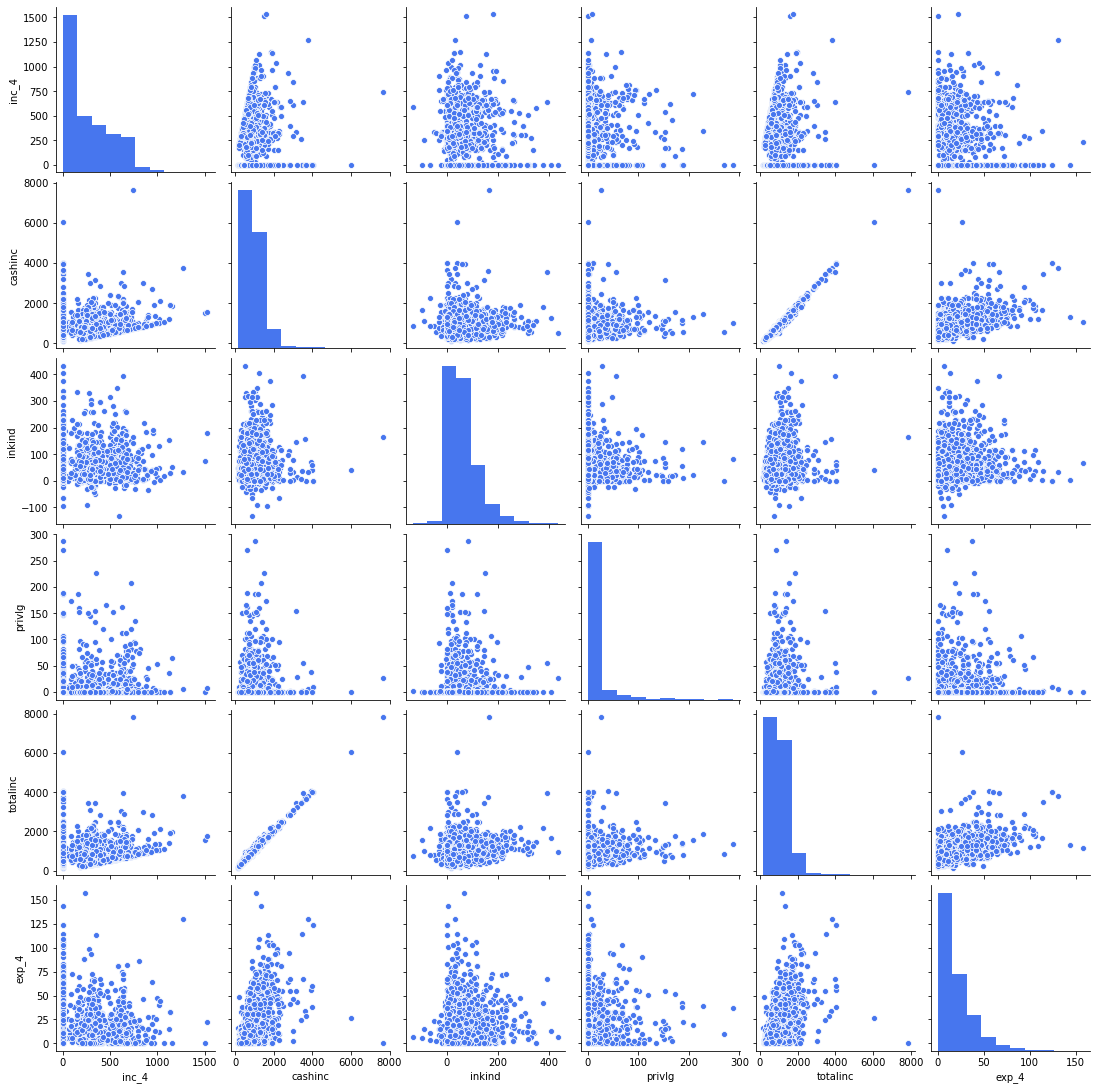

In [3]:
sns.pairplot(df[COLS_FOR_ANALYSIS_t1])

In [4]:
df_grodno = df[df["region"] == "Grodno oblast"]
df_gomel = df[df["region"] == "Gomel oblast"]
print("Наблюдений по Гродненской области: ", len(df_grodno))
print("Наблюдений по Гомельской области: ", len(df_gomel))

Наблюдений по Гродненской области:  234
Наблюдений по Гомельской области:  332


# Матрица корреляций Пирсона для необходимых признаков по Гродненской и Гомельской областям.  

Существенное отличие для корреляций у данных регионов наблюдается для следующей пары признаков: {`inc_4`, `exp_4`} (-0.21 для Гродненской области, -0.41 для Гомельской области) и {`totalinc`, `privlg`} (0.1 и 0.21 соответственно)

Для некоторых пар переменных значение `p-value` для одного из регионов незначительно больше `0.05`, а для другого меньше, но это скорее связано с небольшими объемами выборки.

In [5]:
print("Correlation matrix for Grodno region:")
display(pg.rcorr(df_grodno[COLS_FOR_ANALYSIS_t1], decimals=2, method="pearson", stars=False))
print()
print("Correlation matrix for Gomel region:")
display(pg.rcorr(df_gomel[COLS_FOR_ANALYSIS_t1], decimals=2, method="pearson", stars=False))

Correlation matrix for Grodno region:


,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.06,0.65,0.99,0.06,0.00
cashinc,-0.13,-,0.04,0.3,0.00,0.00
inkind,-0.03,0.13,-,0.43,0.00,0.55
privlg,-0.0,0.07,-0.05,-,0.11,0.05
totalinc,-0.13,0.99,0.29,0.1,-,0.00
exp_4,-0.21,0.56,0.04,0.13,0.55,-



Correlation matrix for Gomel region:


,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.00,0.94,0.02,0.00,0.00
cashinc,-0.16,-,0.02,0.01,0.00,0.00
inkind,0.0,0.13,-,0.74,0.00,0.04
privlg,-0.13,0.14,-0.02,-,0.00,0.00
totalinc,-0.17,0.99,0.24,0.21,-,0.00
exp_4,-0.41,0.58,0.11,0.16,0.58,-


# Матрица корреляций Пирсона после log-преобразования данных  
Для корректного применения лог-трансформации добавим небольшой $epsilon = 10^{-16}$.

Коэффицент корреляций измененились (т.к. логарифм - нелинейное преобразование, а корреляция Пирсона измеряет линейную зависимость между переменными), но эти изменения незначительны.  
Признаки, которые слабо коррелировали между собой остались слабо кореллирующими, а там, где была сильная корреляция, она сохранилась

In [6]:
pg.rcorr(np.log(df[COLS_FOR_ANALYSIS_t1] + 1e-16), decimals=2, method="pearson", stars=False)

,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.00,0.13,0.00,0.00,0.00
cashinc,-0.2,-,0.11,0.20,0.,0.00
inkind,-0.03,0.04,-,0.58,0.00,0.00
privlg,0.13,-0.03,0.01,-,0.88,0.94
totalinc,-0.21,0.99,0.08,0.0,-,0.00
exp_4,-0.16,0.26,0.08,0.0,0.27,-


# Матрица корреляций Спирмена для необходимых признаков до и после лог-трансформации 
Значения корреляций от преобразования не изменились, т.к. коэффицент Спирмена основан на рангах, а логарифм - монотонное преобразование, не меняющее ранга.    
По сравнению с коэффицентом корреляции Пирсона серьезных изменений не обнаружено

In [7]:
print("Before log-transform")
display(pg.rcorr(df[COLS_FOR_ANALYSIS_t1], decimals=2, method="spearman", stars=False))
print()
print("After log-transform")
display(pg.rcorr(np.log(df[COLS_FOR_ANALYSIS_t1] + 1e-16), decimals=2, method="spearman", stars=False))

Before log-transform


,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.00,0.01,0.00,0.00,0.00
cashinc,-0.14,-,0.00,0.31,0.,0.00
inkind,-0.06,0.09,-,0.42,0.00,0.00
privlg,0.13,-0.02,0.02,-,0.52,0.71
totalinc,-0.15,0.99,0.2,0.01,-,0.00
exp_4,-0.33,0.56,0.06,0.01,0.56,-



After log-transform


,inc_4,cashinc,inkind,privlg,totalinc,exp_4
inc_4,-,0.00,0.02,0.00,0.00,0.00
cashinc,-0.14,-,0.00,0.31,0.,0.00
inkind,-0.05,0.09,-,0.46,0.00,0.01
privlg,0.13,-0.02,0.02,-,0.52,0.71
totalinc,-0.15,0.99,0.21,0.01,-,0.00
exp_4,-0.33,0.56,0.06,0.01,0.56,-


# 2. Матрица корреляций Спирмена для категориальных переменных  
Для перевода категориальных переменных к числовому виду напишем свои словари, отсортированные в соответствии со значением категории (например, человек с education = 5 образованнее человека с education <5).   
Значимая корреляция (0.43) обнаружена между переменными `sex` и `smoker`, в предыдущей лабораторной работе мы также установили, что среди мужчин значительно больше курящих, так что наличие корреляции здесь естественно. `p-value = 0`, что подтверждает: корреляция есть. Также имеется положительная корреляция между `salary_categorical` и `healthev`.

In [8]:
df_encoded = df[COLS_FOR_ANALYSIS_t2].copy()
salary_order = {"nan" : np.nan, "0-400" : 0, "400-500" : 1, "500-700" : 2, "700-1000" : 3, ">= 1000" : 4}
sex_order = {"nan" : np.nan , "Female" : 0, "Male" : 1}
sport_order = {"nan" : np.nan, "No" : 0, "Yes, in establishment of education" : 1, "Yes, in free time" : 2, "Yes, on professional basis" : 3}
educat_order = {"nan" : np.nan, "Primary education,Dont Educat" : 0, "Basic education" : 1, "Secondary education" : 2, "Vocational school" : 3, "Secondary specialized education" : 4, "Higher education, After Higher education" : 5}
healthev_order = {"nan" : np.nan, "Bad" : 0, "Not very good, but not bad" : 1, "Good" : 2}
smoker_order = {"nan" : np.nan, "No" : 0, "Yes" : 1}
encoders = [salary_order, sex_order, sport_order, educat_order, healthev_order, smoker_order]

for i in range(len(COLS_FOR_ANALYSIS_t2)):
    col = COLS_FOR_ANALYSIS_t2[i]
    encoder = encoders[i]
    df_encoded[col] = df_encoded[col].astype(str).map(encoder)
    
pg.rcorr(df_encoded, decimals=2, method="spearman", stars=False)

,salary_categorical,sex,sport,educat,healthev,smoker
salary_categorical,-,0.00,0.00,0.00,0.00,0.13
sex,0.2,-,0.04,0.00,0.00,0.00
sport,0.16,-0.05,-,0.00,0.00,0.00
educat,0.24,-0.11,0.21,-,0.00,0.00
healthev,0.11,0.09,0.09,0.1,-,0.00
smoker,0.04,0.43,-0.13,-0.13,0.12,-


# 3. Частные коэффиценты корреляции  
Как можно заметить из матрицы частных корреляций, `totalinc`, `totalexp` и `ppinc_1` положительно коррелируют между собой. При этом интересно, что общие доходы и расходы (между собой почти линейно зависимы - коэффицент 0.93) не всегда зависят от уровня зарплаты (о чем свидетельствует корреляция около 0.5)

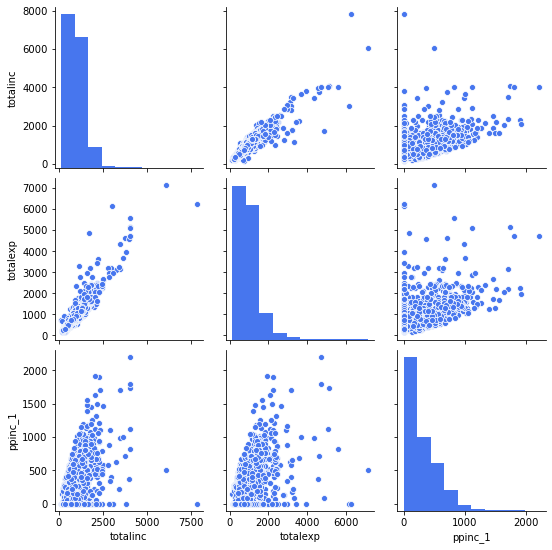

In [9]:
sns.pairplot(df[["totalinc", "totalexp", "ppinc_1"]])

In [10]:
pg.pairwise_corr(df[["totalinc", "totalexp", "ppinc_1"]])[["X", "Y", "r", "p-unc"]]

,X,Y,r,p-unc
0,totalinc,totalexp,0.93,0.00e+00
1,totalinc,ppinc_1,0.48,1.77e-114
2,totalexp,ppinc_1,0.45,4.11e-101


# 4. Множественная регрессия для `exp_4`  

Добавим новый признак: суммарная зарплата по домохозяйству

In [11]:
salary_by_households = df.groupby(["n_uhc"]).sum()["ppinc_1"].rename("ppinc_1_by_household")
df = df.merge(salary_by_households, on="n_uhc")

In [12]:
pg.linear_regression(df[["inc_4", "cashinc", "inkind", "privlg"]], df["exp_4"], add_intercept=False, remove_na=True).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,inc_4,-0.01,0.00,-9.57,0.00,0.66,0.65,-0.01,-0.01
1,cashinc,0.02,0.00,44.15,0.00,0.66,0.65,0.02,0.02
2,inkind,0.01,0.01,1.78,0.08,0.66,0.65,-0.00,0.02
3,privlg,0.05,0.01,3.20,0.00,0.66,0.65,0.02,0.07


In [13]:
pg.linear_regression(df[["inc_4", "cashinc", "inkind", "privlg", "exp_4"]], df["totalexp"], add_intercept=False, remove_na=True).round(2)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,inc_4,-0.02,0.02,-0.94,0.35,0.97,0.97,-0.05,0.02
1,cashinc,1.04,0.01,119.44,0.00,0.97,0.97,1.02,1.06
2,inkind,-0.17,0.07,-2.39,0.02,0.97,0.97,-0.31,-0.03
3,privlg,0.07,0.18,0.39,0.69,0.97,0.97,-0.28,0.42
4,exp_4,1.17,0.28,4.11,0.00,0.97,0.97,0.61,1.73


## Связи для зависимых переменных в а) и б) с переменной зарплаты, рассчитанной как сумма по всему домохозяйству  
Наблюдается положительная корреляция с признаками `cashinc` (0.53), `totalexp` (0.49) и `exp_4` (0.43), а также отрицательная корреляция с `inc_4` (-0.37, т.к. `inc_4` - доход от пенсии). С признаками `inkind` и `privlg` существенной корреляции не обнаружено.

In [14]:
pg.rcorr(df[["inc_4", "cashinc", "inkind", "privlg", "exp_4", "totalexp", "ppinc_1_by_household"]], decimals=2, method="pearson", stars=False)

,inc_4,cashinc,inkind,privlg,exp_4,totalexp,ppinc_1_by_household
inc_4,-,0.03,0.08,0.12,0.00,0.01,0.00
cashinc,-0.05,-,0.00,0.03,0.00,0.,0.00
inkind,-0.04,0.07,-,0.21,0.23,0.02,0.06
privlg,0.04,0.05,-0.03,-,0.00,0.02,0.16
exp_4,-0.24,0.52,0.03,0.06,-,0.00,0.00
totalexp,-0.06,0.94,0.05,0.05,0.52,-,0.00
ppinc_1_by_household,-0.37,0.53,0.04,-0.03,0.43,0.49,-


При построении модели все признаки оказались значимыми (`p-value < 0.05`), поэтому очевидно, что модель тоже значима. Скорректированный R^2 = 0.667

In [15]:
import statsmodels.formula.api as smf

mod = smf.ols("ppinc_1_by_household ~ inc_4 + cashinc + inkind + privlg + exp_4 + totalexp - 1", data=df[["inc_4", "cashinc", "inkind", "privlg", "exp_4", "totalexp", "ppinc_1_by_household"]], ).fit()
print(mod.summary())

                                  OLS Regression Results                                 
Dep. Variable:     ppinc_1_by_household   R-squared (uncentered):                   0.668
Model:                              OLS   Adj. R-squared (uncentered):              0.667
Method:                   Least Squares   F-statistic:                              657.8
Date:                  Sat, 12 Dec 2020   Prob (F-statistic):                        0.00
Time:                          11:41:46   Log-Likelihood:                         -13899.
No. Observations:                  1969   AIC:                                  2.781e+04
Df Residuals:                      1963   BIC:                                  2.784e+04
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

Логарифмирование всех признаков ухудшило качество модели, понизив скорректированный R^2 до 0.343

In [16]:
df_log = np.log(df[["inc_4", "cashinc", "inkind", "privlg", "exp_4", "totalexp", "ppinc_1_by_household"]] + 1e-16)
mod = smf.ols("ppinc_1_by_household ~ inc_4 + cashinc + inkind + privlg + exp_4 + totalexp - 1", data=df_log, ).fit()
print(mod.summary())

                                  OLS Regression Results                                 
Dep. Variable:     ppinc_1_by_household   R-squared (uncentered):                   0.345
Model:                              OLS   Adj. R-squared (uncentered):              0.343
Method:                   Least Squares   F-statistic:                              167.3
Date:                  Sat, 12 Dec 2020   Prob (F-statistic):                   3.47e-171
Time:                          11:41:46   Log-Likelihood:                         -8276.4
No. Observations:                  1915   AIC:                                  1.656e+04
Df Residuals:                      1909   BIC:                                  1.660e+04
Df Model:                             6                                                  
Covariance Type:              nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------

# 5. Ordinal Regression для `healthev`  
Признаки `sport` и `sport_bin` в модели ведут себя одинаково. Скорректированный R^2 = 0.756

In [17]:
df["healthev_int"] = df["healthev"].map(healthev_order)
df["sport_int"] = df["sport"].map(sport_order)
df["sport_bin"] = (df["sport_int"] > 0).astype(int)
health_df = df[["healthev_int", "sport_int", "sport_bin", "bmi"]].dropna()
health_df

,healthev_int,sport_int,sport_bin,bmi
0,2.0,0.0,0,26.20
1,0.0,0.0,0,24.80
2,1.0,0.0,0,30.86
3,2.0,2.0,1,22.89
4,1.0,0.0,0,40.40
...,...,...,...,...
1995,2.0,2.0,1,23.80
1996,1.0,2.0,1,26.44
1997,1.0,0.0,0,22.86
1998,1.0,2.0,1,42.52


In [18]:
mod = smf.ols("healthev_int ~ sport_int + bmi - 1", data=health_df, ).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:           healthev_int   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              3008.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:41:46   Log-Likelihood:                         -1892.5
No. Observations:                1943   AIC:                                      3789.
Df Residuals:                    1941   BIC:                                      3800.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
mod = smf.ols("healthev_int ~ sport_bin + bmi - 1", data=health_df, ).fit()
print(mod.summary())

                                 OLS Regression Results                                
Dep. Variable:           healthev_int   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.756
Method:                 Least Squares   F-statistic:                              3008.
Date:                Sat, 12 Dec 2020   Prob (F-statistic):                        0.00
Time:                        11:41:46   Log-Likelihood:                         -1892.5
No. Observations:                1943   AIC:                                      3789.
Df Residuals:                    1941   BIC:                                      3800.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 6. Многофакторный дисперсионный анализ  


In [20]:
data = df[["ppinc_1", "sex", "educat", "age"]]
data["sex_int"] = data["sex"].map(sex_order)
data["educat_int"] = data["educat"].map(educat_order)
data["age_int"] = pd.cut(data["age"], [18, 24, 34, 44, 54, 64], include_lowest=True, labels=[1, 2, 3, 4, 5])
data = data[["sex_int", "age_int", "educat_int", "ppinc_1"]].dropna()

pg.anova(data=data, dv="ppinc_1", between=["sex_int", "age_int", "educat_int"]).round(2)

,Source,SS,DF,MS,F,p-unc,np2
0,sex_int,0.00e+00,1.0,0.00e+00,0.00,1.00,0.00
1,age_int,0.00e+00,4.0,0.00e+00,0.00,1.00,0.00
2,educat_int,9.49e+07,5.0,1.90e+07,255.87,0.00,0.46
3,sex_int * age_int,7.49e+05,4.0,1.87e+05,2.52,0.04,0.01
4,sex_int * educat_int,2.82e+06,5.0,5.63e+05,7.59,0.00,0.02
5,age_int * educat_int,9.49e+06,20.0,4.74e+05,6.39,0.00,0.08
6,sex_int * age_int * educat_int,3.25e+06,20.0,1.62e+05,2.19,0.00,0.03
7,Residual,1.13e+08,1525.0,7.42e+04,NaN,NaN,NaN
